In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf


from model import ImageModel
from utils import load_image, display_image

Using TensorFlow backend


/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/models/back

In [2]:
BATCH_SIZE = 8
backbone = "csp_darknet"

In [3]:
model = ImageModel(backbone=backbone)

train_dataset, test_dataset = tfds.load(
    'rock_paper_scissors',
    as_supervised=True,
    split=["train", "test"],
)

train_dataset = train_dataset.batch(BATCH_SIZE).map(
    lambda x, y: model.preprocess_data(x, y, augment=True),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

test_dataset = test_dataset.batch(BATCH_SIZE).map(
    lambda x, y: model.preprocess_data(x, y, augment=True),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

In [4]:
model.train(f"output/{backbone}_{BATCH_SIZE}", train_dataset, test_dataset)

Training:   0%|           0/8 ETA: ?s,  ?epochs/s

Epoch 1/8


0/315           ETA: ?s - 

I0000 00:00:1705035372.298015   22050 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 2/8


0/315           ETA: ?s - 

Epoch 3/8


0/315           ETA: ?s - 

Epoch 4/8


0/315           ETA: ?s - 

Epoch 5/8


0/315           ETA: ?s - 

Epoch 6/8


0/315           ETA: ?s - 

Epoch 7/8


0/315           ETA: ?s - 

Epoch 8/8


0/315           ETA: ?s - 

/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/models/task.py:43: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


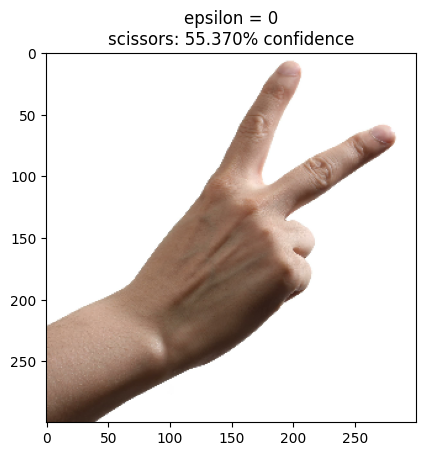

In [5]:
image = load_image("data/scissors.jpg")
image_class, class_confidence, _ = model.predict(image)
display_image(image, 0, image_class, class_confidence)

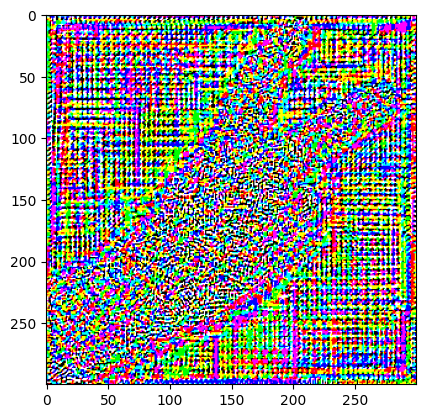

In [6]:
_, pertubations = model.generate_adv_image(image, 0.3, return_pertubations=True)
plt.imshow(pertubations[0]*0.5 + 0.5) # To change [-1, 1] to [0,1]

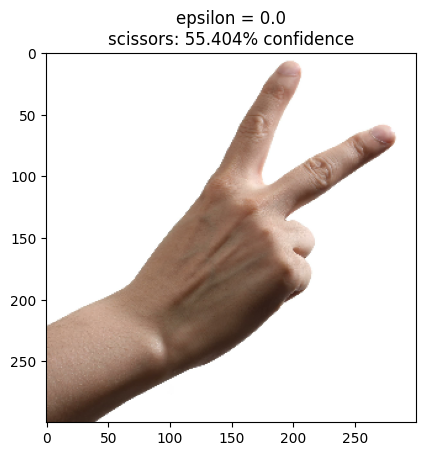

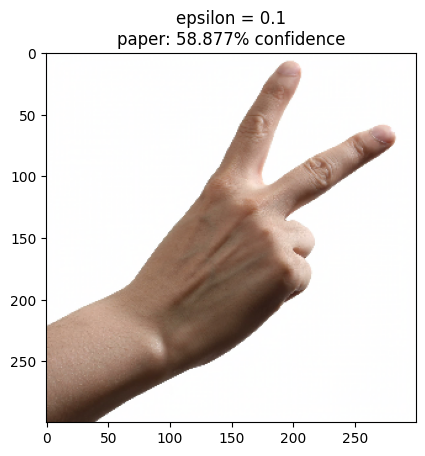

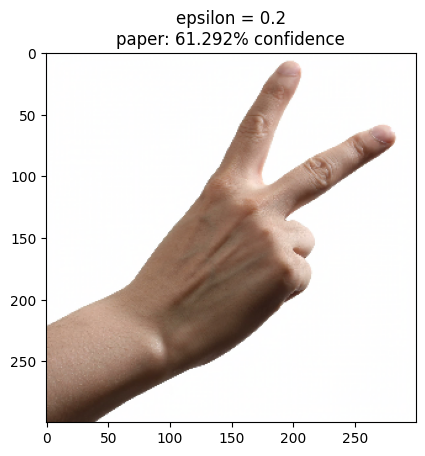

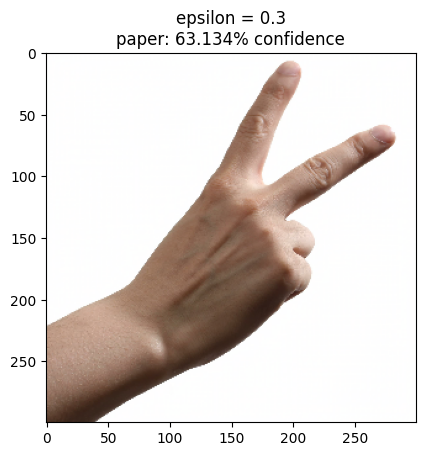

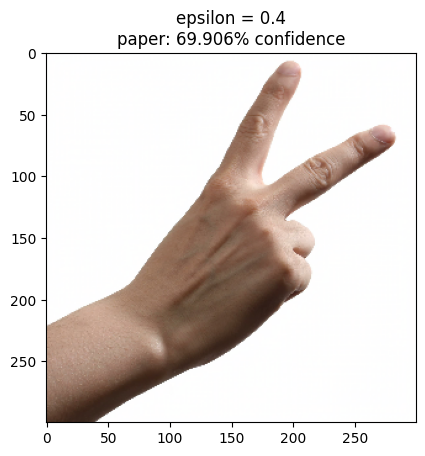

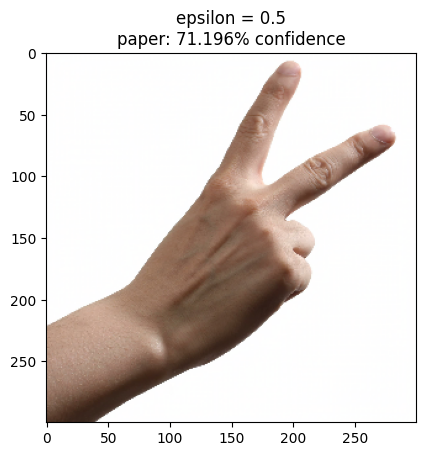

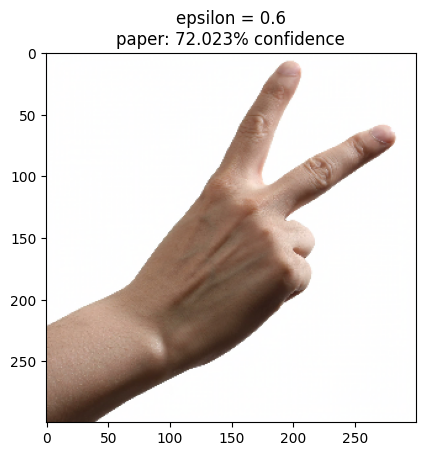

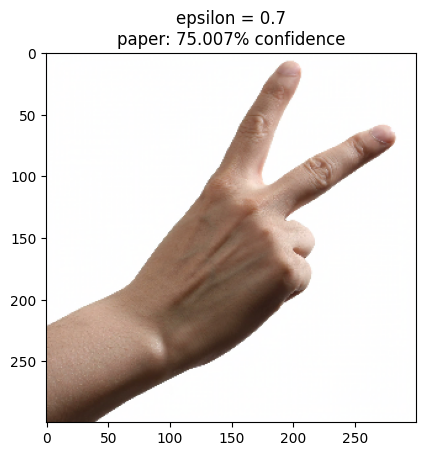

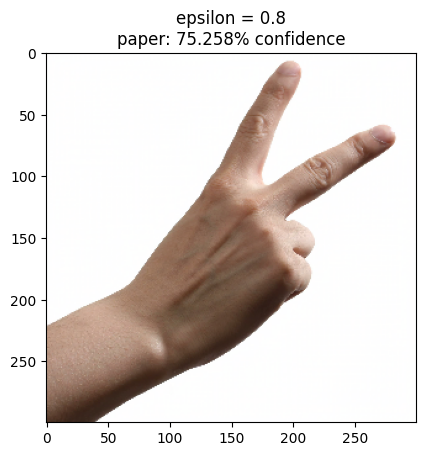

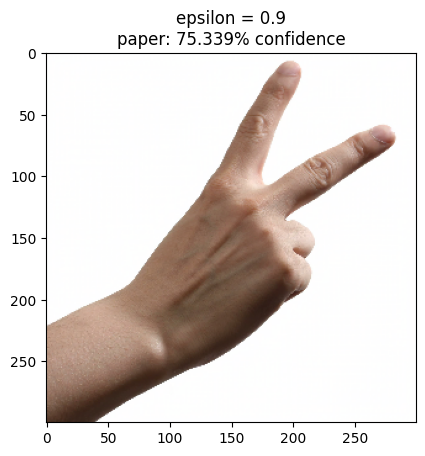

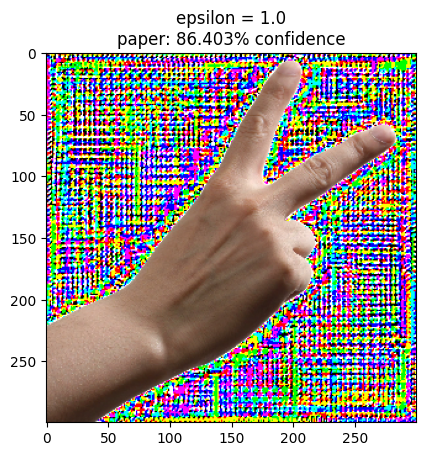

In [7]:
for sigma in range(11):
    sigma = sigma/10
    adv_img = model.generate_adv_image(image, sigma)
    image_class, class_confidence, _ = model.predict(tf.cast(adv_img, tf.uint8))
    display_image(adv_img, sigma, image_class, class_confidence)

In [8]:
model.model(image)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.23075107, 0.21554525, 0.5537037 ]], dtype=float32)>

In [9]:
tf.math.argmax(model.model(image)[0])

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [10]:
train_dataset2, test_dataset2 = tfds.load(
    'rock_paper_scissors',
    as_supervised=True,
    split=["train", "test"],
)

train_dataset2 = train_dataset2.batch(BATCH_SIZE).map(
    lambda x, y: model.preprocess_data(x, y, augment=True, sigma=0.9),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

test_dataset2 = test_dataset2.batch(BATCH_SIZE).map(
    lambda x, y: model.preprocess_data(x, y, augment=True),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)


model2 = ImageModel(backbone=backbone)